1. Answer for question one.

In [4]:
defective_probability <- function() {
  cat("Enter production proportions (x1, x2, x3):\n")
  x1 <- as.numeric(readline("x1: "))
  x2 <- as.numeric(readline("x2: "))
  x3 <- as.numeric(readline("x3: "))

  if (sum(x1, x2, x3) != 1 || any(c(x1, x2, x3) < 0.10 | c(x1, x2, x3) > 0.40)) {
    stop("Invalid input for x values. They must be between 0.10 and 0.40 and sum to 1.")
  }

  cat("Enter defect rates (y1, y2, y3):\n")
  y1 <- as.numeric(readline("y1: "))
  y2 <- as.numeric(readline("y2: "))
  y3 <- as.numeric(readline("y3: "))

  if (sum(y1, y2, y3) != 0.12 || any(c(y1, y2, y3) < 0.01 | c(y1, y2, y3) > 0.05)) {
    stop("Invalid input for y values. They must be between 0.01 and 0.05 and sum to 0.12.")
  }

  P_defective <- x1 * y1 + x2 * y2 + x3 * y3

  cat("The probability of selecting a defective product is:", P_defective, "\n")
}

defective_probability()

x1: 0.30
x2: 0.40
x3: 0.30
y1: 0.04
y2: 0.04
y3: 0.04
Enter production proportions (x1, x2, x3):
Enter defect rates (y1, y2, y3):
The probability of selecting a defective product is: 0.04 


2. With your own computing experience, develop a front end to R that allows the user


*   to input the values of a univariate discrete random variable and the associated probabilities and to obtain the mean and variance, and
*   to input the values of a bivariate discrete random variable and the associated probabilities and to obtain the marginal and conditional distributions.

Your program should provide a facility to calculate the mean and variance of each distribution, and to plot the pdf and cdf. In each program, do validity checks that the probabilities are in the interval [0, 1], and that they sum to one.



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




$mean
[1] 3.2

$variance
[1] 1.56



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


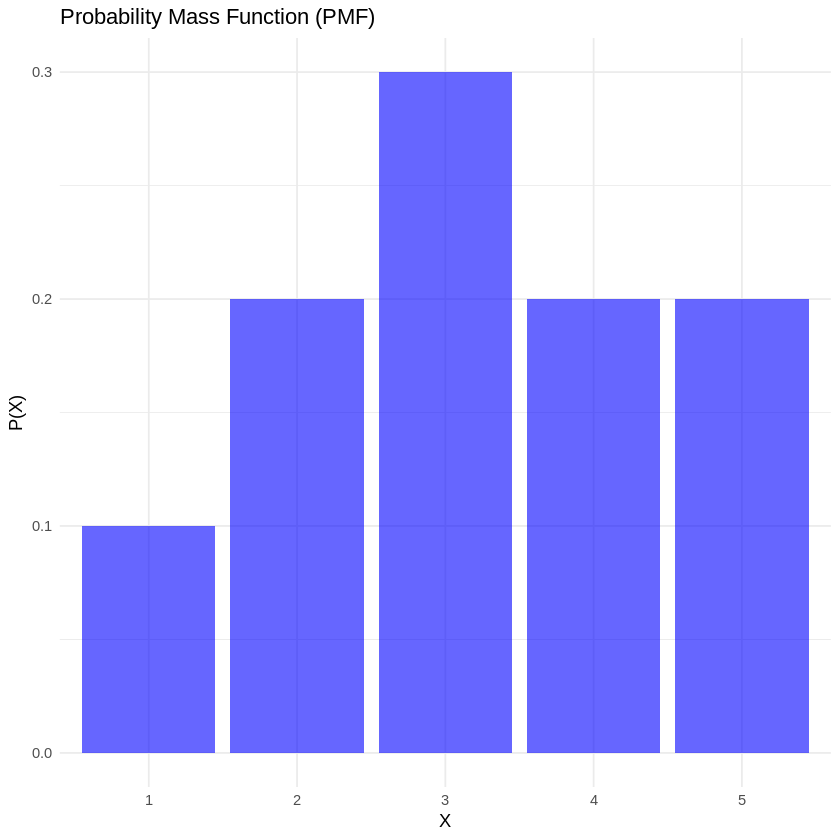

Warning message in matrix(c(0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1), nrow = 2, byrow = TRUE):
“data length [7] is not a sub-multiple or multiple of the number of rows [2]”


$marginal_x
[1] 0.5 0.5

$marginal_y
[1] 0.2 0.4 0.2 0.2

$conditional_x_given_y
     [,1] [,2] [,3] [,4]
[1,]  0.5  0.5  0.5  0.5
[2,]  0.5  0.5  0.5  0.5

$conditional_y_given_x
     [,1] [,2] [,3] [,4]
[1,]  0.2  0.4  0.2  0.2
[2,]  0.2  0.4  0.2  0.2



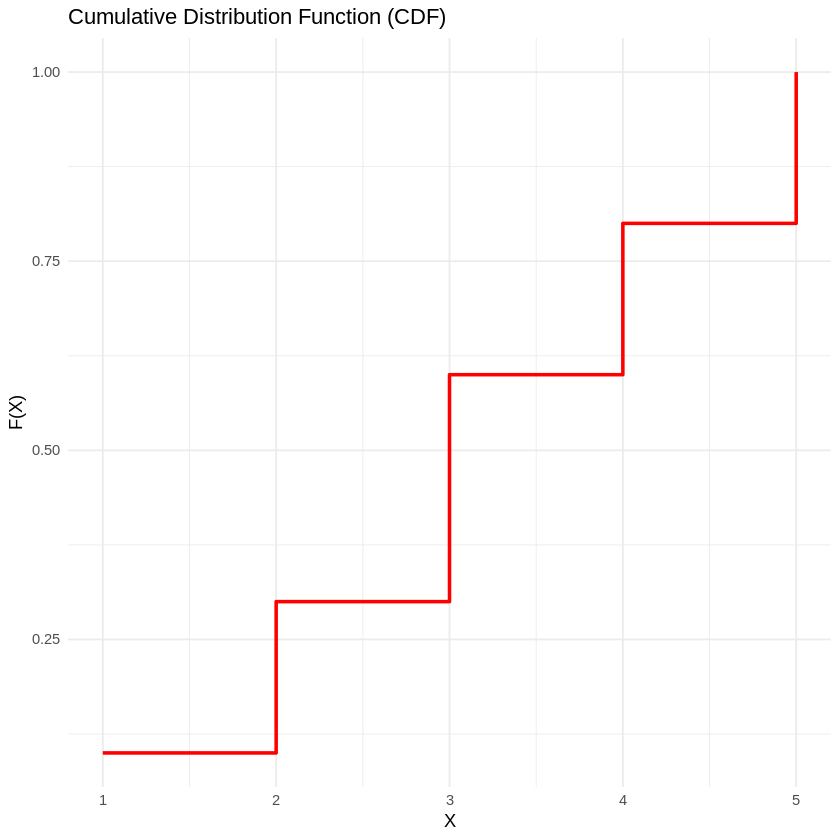

In [ ]:
install.packages("ggplot2")
install.packages("dplyr")

library(ggplot2)
library(dplyr)

validate_probabilities <- function(probs) {
  if (any(probs < 0 | probs > 1)) {
    stop("Error: Probabilities must be between 0 and 1.")
  }
  if (sum(probs) != 1) {
    stop("Error: Probabilities must sum to 1.")
  }
}

compute_univariate_stats <- function(values, probabilities) {
  validate_probabilities(probabilities)

  mean_value <- sum(values * probabilities)
  variance_value <- sum(((values - mean_value) ^ 2) * probabilities)

  return(list(mean = mean_value, variance = variance_value))
}

plot_pmf_cdf <- function(values, probabilities) {
  df <- data.frame(x = values, prob = probabilities)

  pmf_plot <- ggplot(df, aes(x = factor(x), y = prob)) +
    geom_bar(stat = "identity", fill = "blue", alpha = 0.6) +
    labs(title = "Probability Mass Function (PMF)", x = "X", y = "P(X)") +
    theme_minimal()

  print(pmf_plot)

  df <- df %>%
    arrange(x) %>%
    mutate(cdf = cumsum(prob))

  cdf_plot <- ggplot(df, aes(x = x, y = cdf)) +
    geom_step(color = "red", size = 1) +
    labs(title = "Cumulative Distribution Function (CDF)", x = "X", y = "F(X)") +
    theme_minimal()

  print(cdf_plot)
}

values <- c(1, 2, 3, 4, 5)
probabilities <- c(0.1, 0.2, 0.3, 0.2, 0.2)

stats <- compute_univariate_stats(values, probabilities)
print(stats)

plot_pmf_cdf(values, probabilities)

compute_bivariate_marginal_conditional <- function(joint_table) {
  row_sums <- rowSums(joint_table)
  col_sums <- colSums(joint_table)

  conditional_x_given_y <- sweep(joint_table, 2, col_sums, FUN = "/")
  conditional_y_given_x <- sweep(joint_table, 1, row_sums, FUN = "/")

  return(list(marginal_x = row_sums, marginal_y = col_sums,
              conditional_x_given_y = conditional_x_given_y,
              conditional_y_given_x = conditional_y_given_x))
}

joint_table <- matrix(c(0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1),
                      nrow = 2, byrow = TRUE)

bivariate_results <- compute_bivariate_marginal_conditional(joint_table)
print(bivariate_results)

3. Answer for question three.

Enter probability p (e.g., 0.6 for 60% success rate): 0.7
Simulated Mean: 1.4254 
Simulated Variance: 0.6044953 
Conditional Mean given X > 3: 1.458498 
Conditional Variance given X > 3: 0.6937073 
P(X = 4 | X > 3): 0.194382   P(X = 1): 0.7005 
P(X = 5 | X > 3): 0.06179775   P(X = 2): 0.2105 


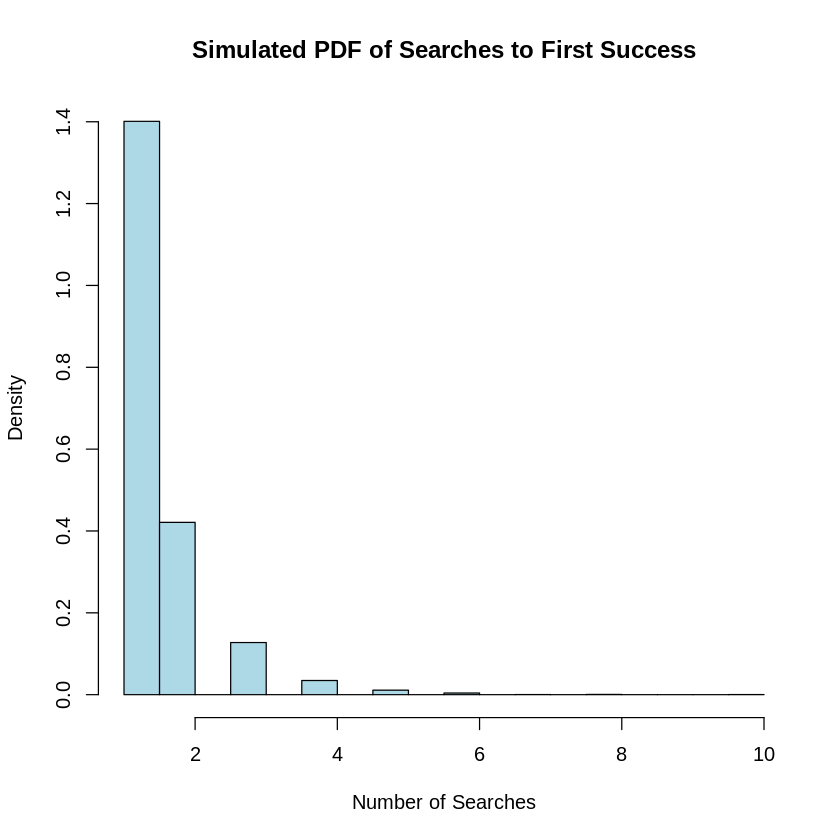

In [5]:
set.seed(123)

p <- as.numeric(readline("Enter probability p (e.g., 0.6 for 60% success rate): "))

n_sim <- 10000

searches <- rgeom(n_sim, prob = p) + 1

hist(searches, probability = TRUE, main = "Simulated PDF of Searches to First Success",
     xlab = "Number of Searches", col = "lightblue", border = "black")

mean_sim <- mean(searches)
var_sim <- var(searches)

cat("Simulated Mean:", mean_sim, "\n")
cat("Simulated Variance:", var_sim, "\n")

searches_conditional <- searches[searches > 3] - 3
mean_cond <- mean(searches_conditional)
var_cond <- var(searches_conditional)

cat("Conditional Mean given X > 3:", mean_cond, "\n")
cat("Conditional Variance given X > 3:", var_cond, "\n")

p_X4_given_X3 <- mean(searches == 4) / mean(searches >= 3)
p_X1 <- mean(searches == 1)
p_X5_given_X3 <- mean(searches == 5) / mean(searches >= 3)
p_X2 <- mean(searches == 2)

cat("P(X = 4 | X > 3):", p_X4_given_X3, "  P(X = 1):", p_X1, "\n")
cat("P(X = 5 | X > 3):", p_X5_given_X3, "  P(X = 2):", p_X2, "\n")